# Análisis exploratorio

Importando librerías

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Se lee el archivo de ClassicHit.csv, el cual consta de 15,150 canciones, todas siendo
hits clásicos, 3,083 artistas, 19 géneros de música, teniendo un total de 100 años en historia de la música
de 1923 a 2023.
[Dataset](https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023)

In [4]:
df = pd.read_csv("ClassicHit.csv")
sns.set_theme(style="darkgrid")

Se muestra el contenido del DataFrame

In [6]:
print(df)

                                Track          Artist  Year  Duration  \
0                    Hey Jack Kerouac  10,000 Maniacs  1987    206413   
1                    Like the Weather  10,000 Maniacs  1987    236653   
2             What's the Matter Here?  10,000 Maniacs  1987    291173   
3                          Trouble Me  10,000 Maniacs  1989    193560   
4               Candy Everybody Wants  10,000 Maniacs  1992    185960   
...                               ...             ...   ...       ...   
15145  7 Seconds (feat. Neneh Cherry)  Youssou N'Dour  1994    306226   
15146                          Birima  Youssou N'Dour  1995    228373   
15147                             Set  Youssou N'Dour  2004    226826   
15148                Africa Remembers  Youssou N'Dour  2007    560466   
15149                       Wiri-Wiri  Youssou N'Dour  2007    247466   

       Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                   4         0.616   0.51

In [8]:
# Se observan los tipos de datos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

## Canciones y sus fechas como hits
Se muestra la cantidad de canciones lanzadas por año

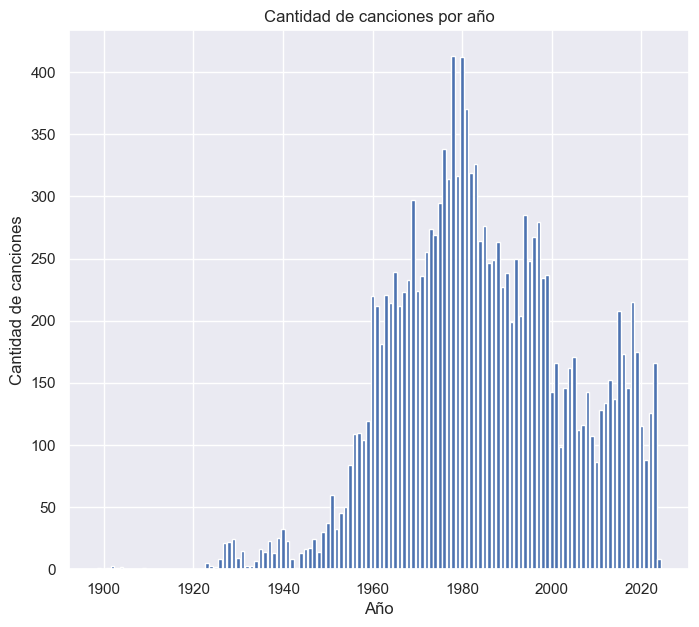

In [10]:
# Se cuentan las canciones por año y se reordenan los indices
year_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,7))
plt.bar(year_count.index, year_count.values)
plt.title('Cantidad de canciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.show()

Se puede obserbar que la mayor cantidad de canciones que fueron hits, fue en la epoca de los 80's, tendiendo a caer los próximos años.

## Canciones y su género
Cantidad de canciones y su género

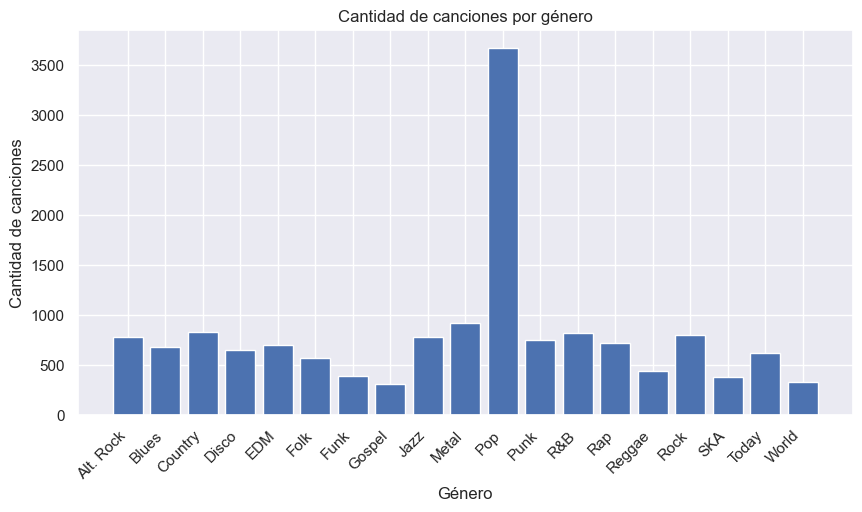

In [12]:
# Se cuentan el total de canciones por género
genre_count = df['Genre'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(genre_count.index, genre_count.values)
plt.title('Cantidad de canciones por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de canciones')
plt.xticks(rotation=45, ha='right')
plt.show()

## Duración en segundos de las canciones
Relación entre las canciones y el tiempo que tienden a durar

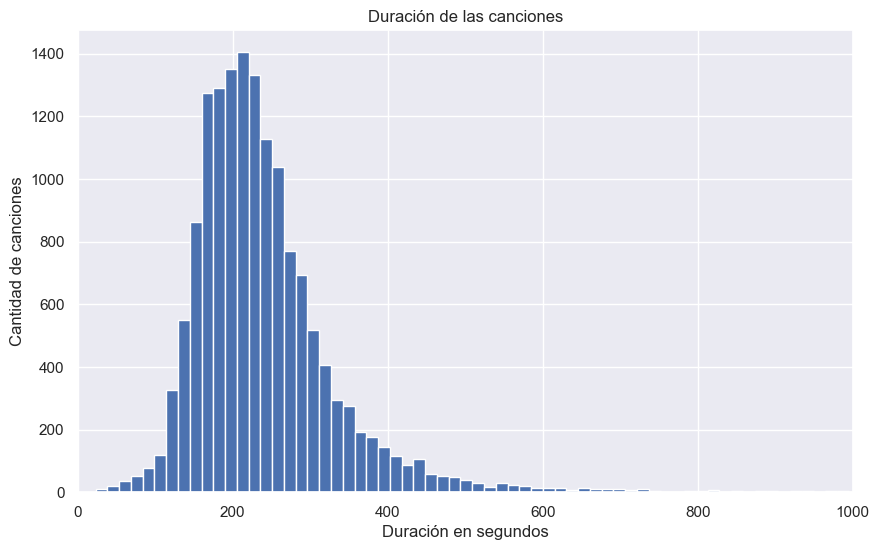

In [14]:
# Se agrega una columna para guardar el dato de la duración de las canciones en segundos
df['Duration_sec'] = df['Duration'] / 1000

plt.figure(figsize=(10,6))
plt.hist(df['Duration_sec'], bins=200)
plt.title('Duración de las canciones')
plt.xlabel('Duración en segundos')
plt.ylabel('Cantidad de canciones')
plt.xlim(0,1000)
plt.show()

## Duración media de las canciones clasificadas por género

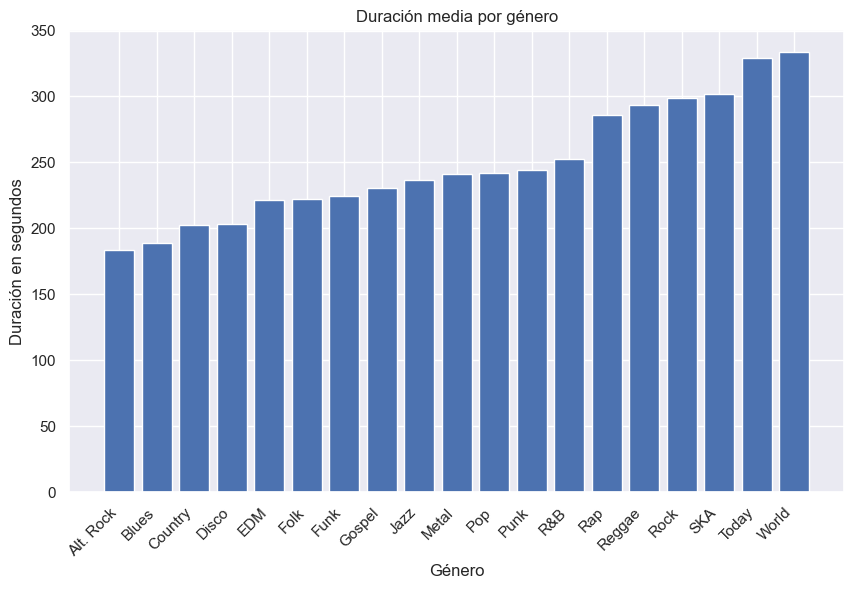

In [16]:
# Se agrupan los datos por género y se calcula la media por su duración en segundos
duration_by_gen = df.groupby('Genre')['Duration_sec'].mean()

plt.figure(figsize=(10,6))
plt.bar(duration_by_gen.index, duration_by_gen.sort_values())
plt.title('Duración media por género')
plt.xlabel('Género')
plt.ylabel('Duración en segundos')
plt.xticks(rotation=45, ha='right')
plt.show()

## Popularidad media de las canciones clasificadas por género

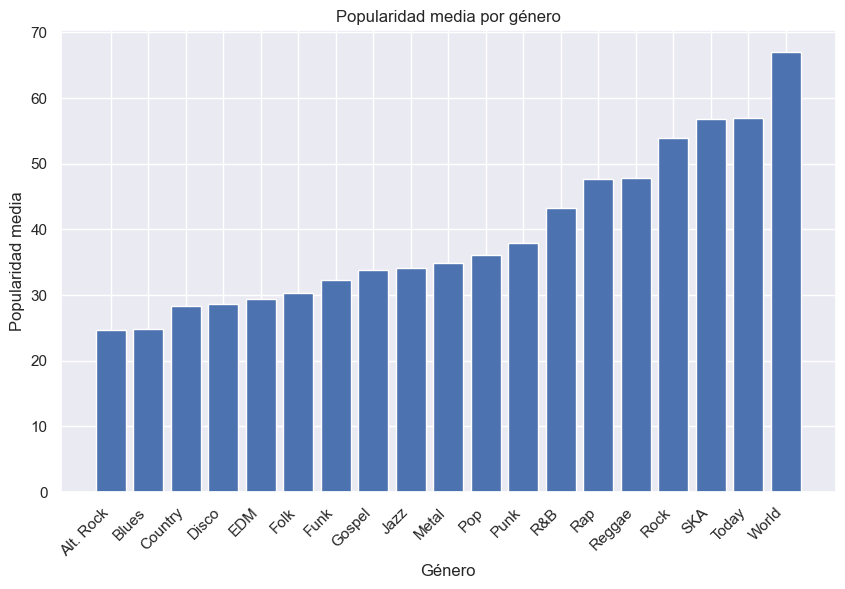

In [18]:
# Se agrupan los datos por género y se calcula la media por su popularidad
genre_popular_df = df.groupby('Genre')['Popularity'].mean()

plt.figure(figsize=(10,6))
plt.bar(genre_popular_df.index, genre_popular_df.sort_values())
plt.xlabel('Género')
plt.ylabel('Popularidad media')
plt.title('Popularidad media por género')
plt.xticks(rotation=45, ha='right')
plt.show()

# Top 20 artistas por popularidad media de las canciones en el genero World

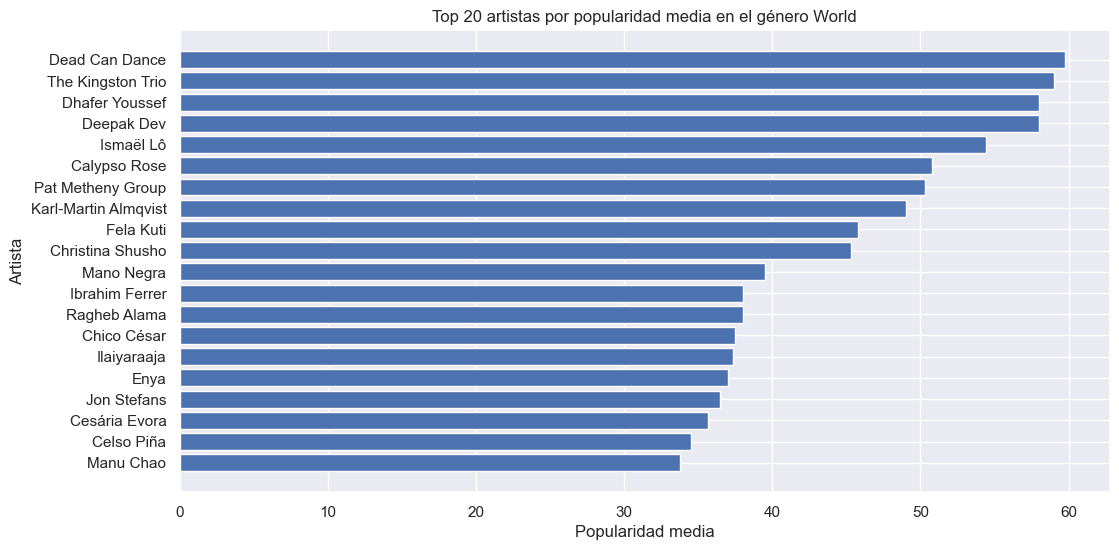

In [20]:
# Se filtra y crea un nuevo DataFrame por el género World y se guarda en la variable world_df
world_df = df[df['Genre'] == 'World']

# Se agrupa por artista y se calcula la media por popularidad
avg = world_df.groupby('Artist')['Popularity'].mean()

# Se optiene el top 20
top_20_worldgenre__artist = avg.nlargest(20)

plt.figure(figsize=(12,6))
plt.barh(top_20_worldgenre__artist.index, top_20_worldgenre__artist.sort_values())
plt.xlabel('Popularidad media')
plt.ylabel('Artista')
plt.title('Top 20 artistas por popularidad media en el género World')
plt.show()

## Top 20 canciones por popularidad media en el género World

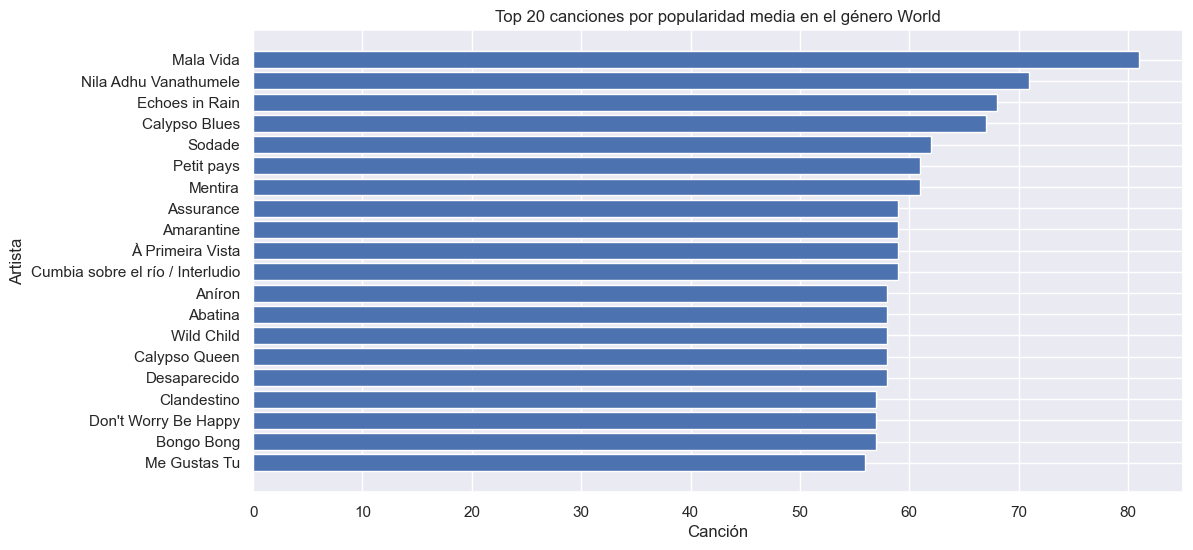

In [22]:
# Se agrupa el DataFrame por cancion y se calcula la media por popularidad
tracks_avg = world_df.groupby('Track')['Popularity'].mean()

# Se obtienen las primeras 20 canciones
top_20_worldgenre_tracks = tracks_avg.nlargest(20)

plt.figure(figsize=(12,6))
plt.barh(top_20_worldgenre_tracks.index, top_20_worldgenre_tracks.sort_values())
plt.xlabel('Canción')
plt.ylabel('Artista')
plt.title('Top 20 canciones por popularidad media en el género World')
plt.show()

## ¿Qué tan bailables han sido las canciones de género World durante el tiempo?

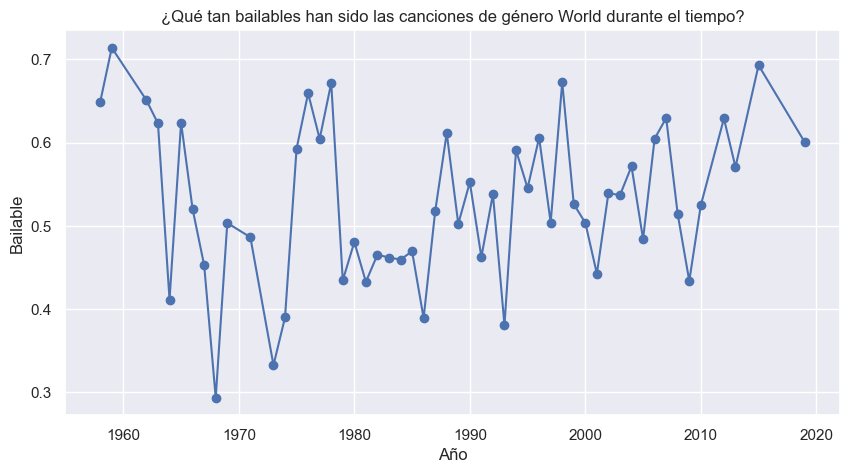

In [24]:
# Se filtra y crea un nuevo DataFrame por el género World
pop_df = df[df['Genre'] == 'World']

# Se agrupa por año y se calcula la media
avg = pop_df.groupby('Year')['Danceability'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg.index, avg.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Bailable')
plt.title('¿Qué tan bailables han sido las canciones de género World durante el tiempo?')
plt.show()

## Géneros de canciones más escuchadas durante el tiempo

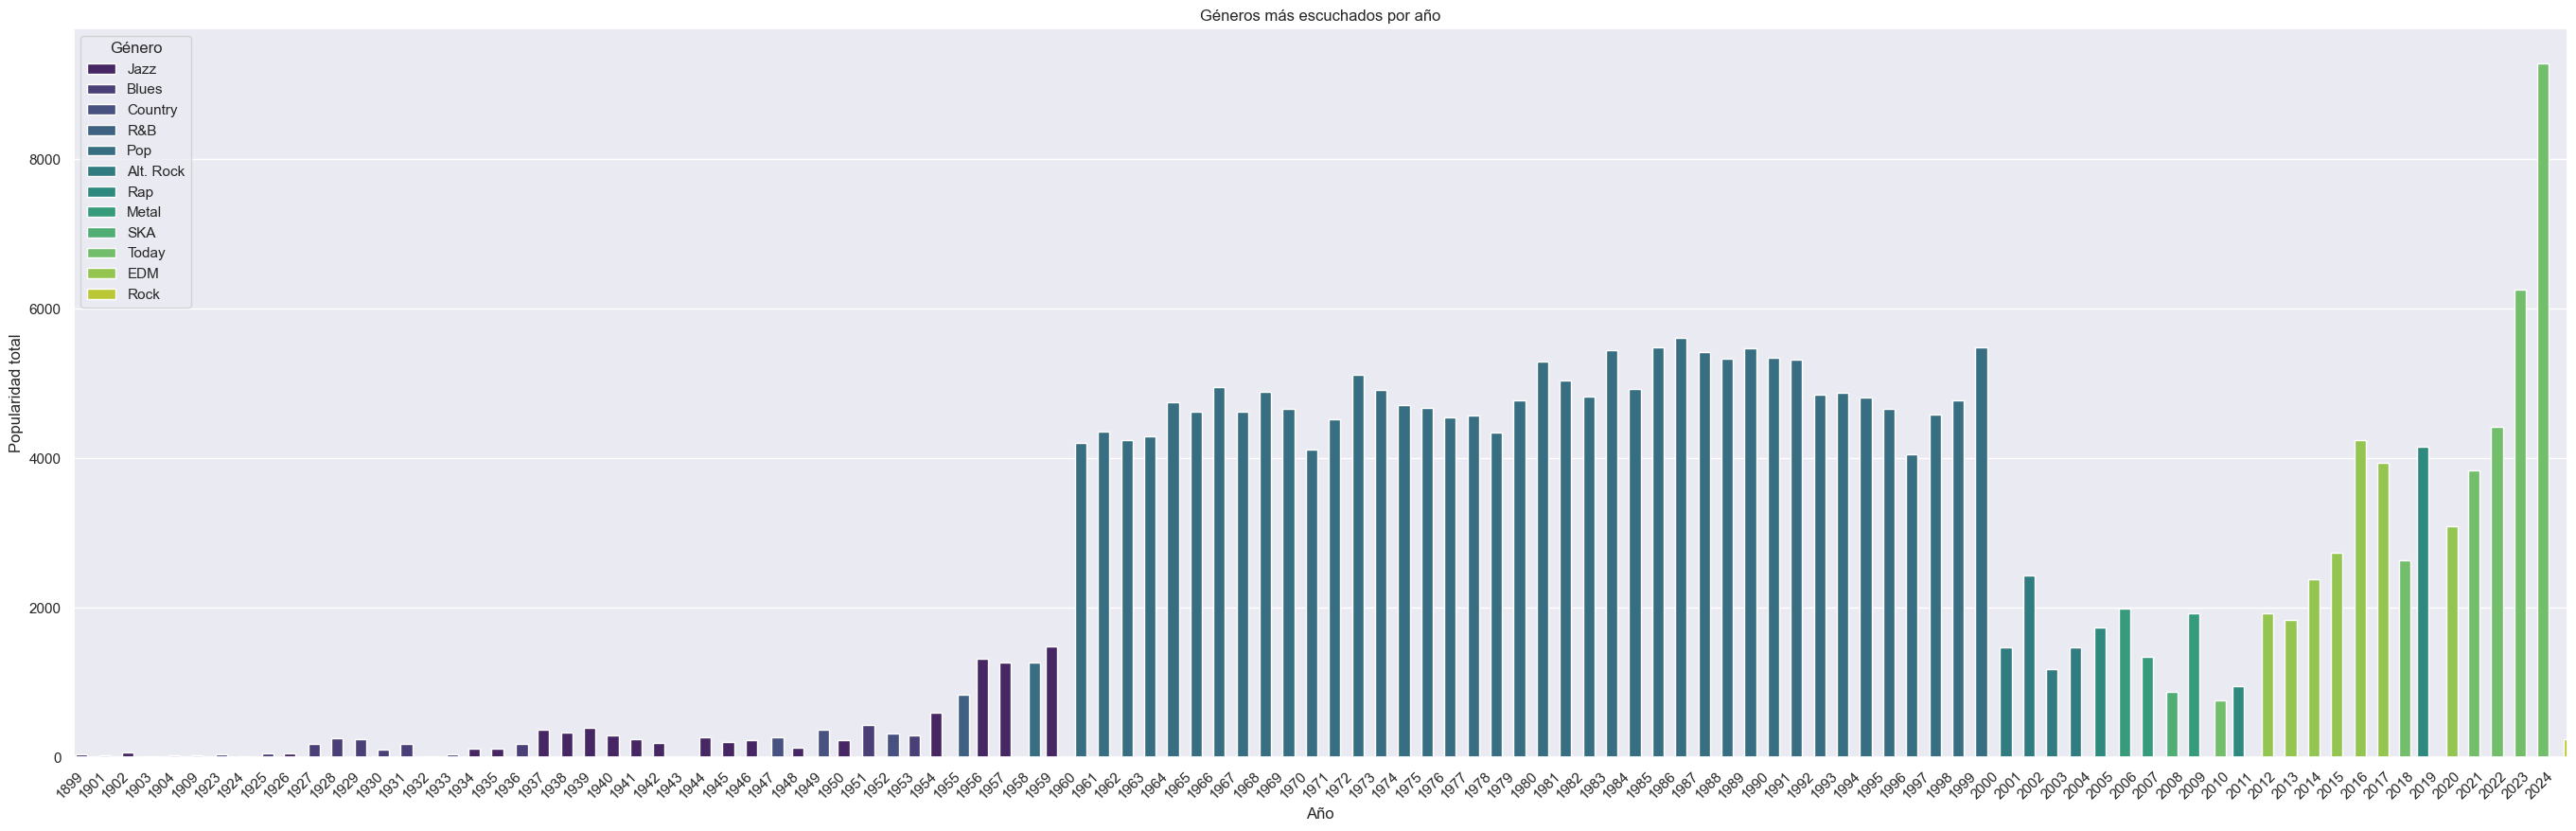

In [26]:
# Se agrupa el DataFrame por año y genero, y se suma su popularidad para cada combinación de año y género
genre_by_year = df.groupby(['Year', 'Genre'])['Popularity'].sum().reset_index()

# Se agrua el DataFrame por Año, se selecciona la columna de popularidad para cada grupo y se obtienen los indices de las filas con el valor maximo de popularidad para cada año
top_genres_by_year = genre_by_year.loc[genre_by_year.groupby('Year')['Popularity'].idxmax()]

plt.figure(figsize=(34, 10))
ax = sns.barplot(x='Year', y='Popularity',data=top_genres_by_year, hue='Genre',palette='viridis')

# Se ajusta el ancho de las barras del gráfico
for patch in ax.patches:
    patch.set_width(0.5)
    
plt.title('Géneros más escuchados por año')
plt.xlabel('Año')
plt.ylabel('Popularidad total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

plt.show()

### Otra forma de visualizar los datos

C:\Users\s_smm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s_smm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


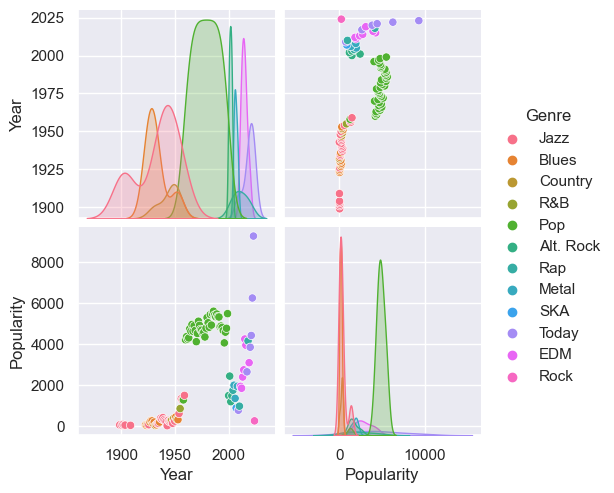

In [27]:
sns.pairplot(top_genres_by_year, hue='Genre')
plt.show()